In [18]:
!pip install pgmpy

In [19]:
# Importing required libraries
import numpy as np
import pandas as pd
import logging
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
from IPython.display import clear_output
from pgmpy.factors.discrete import TabularCPD

# Clear the output to maintain a clean interface
clear_output()

# Check if 'pgmpy' is installed and display a confirmation message
try:
    import pkg_resources
    if 'pgmpy' in [pkg.key for pkg in pkg_resources.working_set]:
        print("pgmpy installed successfully!")
    else:
        raise ImportError("pgmpy not installed. Please try again.")
except ImportError as e:
    print(e)

print("Required libraries imported successfully!")

# Exercise 2: Define the Bayesian Network Structure


# Create the structure for the Bayesian Network
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

# Initialize and define the Bayesian Network
bayesian_model = BayesianNetwork(edges)

print("Bayesian Network structure created successfully!")


pgmpy installed successfully!
Required libraries imported successfully!
Bayesian Network structure created successfully!


In [20]:

#@title Exercise 3: Define Conditional Probability Tables (CPTs)

# Define helper function to create TabularCPD
def create_cpd(variable, variable_card, values, state_names=None, evidence=None, evidence_card=None):
    return TabularCPD(
        variable=variable,
        variable_card=variable_card,
        values=values,
        state_names=state_names,
        evidence=evidence,
        evidence_card=evidence_card
    )

# Define CPDs for variables without parents
cpd_age = create_cpd(
    variable='Age',
    variable_card=3,
    values=[[0.3], [0.5], [0.2]],
    state_names={'Age': ['Young', 'Middle-aged', 'Old']}
)

cpd_smoking = create_cpd(
    variable='Smoking',
    variable_card=2,
    values=[[0.7], [0.3]],
    state_names={'Smoking': ['No', 'Yes']}
)

cpd_exercise = create_cpd(
    variable='Exercise',
    variable_card=2,
    values=[[0.6], [0.4]],
    state_names={'Exercise': ['Regular', 'None']}
)

cpd_cholesterol = create_cpd(
    variable='Cholesterol',
    variable_card=2,
    values=[[0.7], [0.3]],
    state_names={'Cholesterol': ['Normal', 'High']}
)

cpd_bp = create_cpd(
    variable='Blood Pressure',
    variable_card=2,
    values=[[0.8], [0.2]],
    state_names={'Blood Pressure': ['Normal', 'High']}
)

# Define CPD for Heart Disease
cpd_heart_disease = create_cpd(
    variable='Heart Disease',
    variable_card=2,
    values=[
        [0.95, 0.9, 0.7, 0.5, 0.85, 0.7, 0.5, 0.3, 0.8, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1,
         0.9, 0.8, 0.6, 0.4, 0.75, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1, 0.6, 0.4, 0.2, 0.05,
         0.85, 0.75, 0.55, 0.35, 0.7, 0.55, 0.35, 0.2, 0.65, 0.45, 0.25, 0.1, 0.5, 0.3, 0.15, 0.05],
        [0.05, 0.1, 0.3, 0.5, 0.15, 0.3, 0.5, 0.7, 0.2, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9,
         0.1, 0.2, 0.4, 0.6, 0.25, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9, 0.4, 0.6, 0.8, 0.95,
         0.15, 0.25, 0.45, 0.65, 0.3, 0.45, 0.65, 0.8, 0.35, 0.55, 0.75, 0.9, 0.5, 0.7, 0.85, 0.95]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2, 2],
    state_names={
        'Heart Disease': ['No', 'Yes'],
        'Age': ['Young', 'Middle-aged', 'Old'],
        'Smoking': ['No', 'Yes'],
        'Exercise': ['Regular', 'None'],
        'Cholesterol': ['Normal', 'High'],
        'Blood Pressure': ['Normal', 'High']
    }
)

# Define CPDs for Chest Pain and ECG Result
cpd_chest_pain = create_cpd(
    variable='Chest Pain',
    variable_card=2,
    values=[[0.9, 0.3], [0.1, 0.7]],
    evidence=['Heart Disease'],
    evidence_card=[2],
    state_names={'Chest Pain': ['No', 'Yes'], 'Heart Disease': ['No', 'Yes']}
)

cpd_ecg = create_cpd(
    variable='ECG Result',
    variable_card=2,
    values=[[0.8, 0.2], [0.2, 0.8]],
    evidence=['Heart Disease'],
    evidence_card=[2],
    state_names={'ECG Result': ['Normal', 'Abnormal'], 'Heart Disease': ['No', 'Yes']}
)

# Add CPDs to the model and validate it
model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bp,
               cpd_heart_disease, cpd_chest_pain, cpd_ecg)

if model.check_model():
    print("Model is valid and CPDs are correctly defined!")
else:
    print("Error: Model is not valid. Please check your CPDs.")



Model is valid and CPDs are correctly defined!


In [21]:
# Exercise 4: Inference in the Bayesian Network

# Initialize the inference engine using the Variable Elimination algorithm
inference = VariableElimination(model)

# Query 1: Probability of Heart Disease given specific conditions
query1 = inference.query(variables=['Heart Disease'],
                         evidence={'Age': 'Middle-aged',
                                   'Smoking': 'Yes',
                                   'Cholesterol': 'High',
                                   'Blood Pressure': 'High'})

print("Query 1 Result:")
print(query1)

# Explanation of Query 1:
# This query calculates the probability of having Heart Disease for a patient who is:
# - Middle-aged
# - A smoker
# - Has high cholesterol
# - Has high blood pressure
# It evaluates the interplay of these significant risk factors to provide insights into the likelihood of heart disease.

# Query 2: Probability of Abnormal ECG given Chest Pain
query2 = inference.query(variables=['ECG Result'],
                         evidence={'Chest Pain': 'Yes'})

print("\nQuery 2 Result:")
print(query2)

# Explanation of Query 2:
# This query assesses the probability of an abnormal ECG result in patients experiencing chest pain.
# It explores the relationship between a symptom (chest pain) and a diagnostic result (ECG),
# helping identify potential indications of heart disease.

# Query 3: Probability distribution of Heart Disease in patients who do not exercise
query3 = inference.query(variables=['Heart Disease'],
                         evidence={'Exercise': 'None'})

print("\nQuery 3 Result:")
print(query3)

# Explanation of Query 3:
# This query analyzes the probability distribution of Heart Disease in patients who do not exercise regularly.
# It highlights how lifestyle choices, such as lack of physical activity, can influence the risk of heart disease.

# Overall Explanation:
# This exercise demonstrates probabilistic inference in a Bayesian Network using Variable Elimination.
# The three queries focus on:
# - Risk factor combinations (Query 1)
# - Symptom-diagnostic relationships (Query 2)
# - Lifestyle impact on health (Query 3)
# These queries provide insights into heart health and emphasize the utility of Bayesian Networks in probabilistic reasoning and decision-making.


Query 1 Result:
+--------------------+----------------------+
| Heart Disease      |   phi(Heart Disease) |
+====================+======================+
| Heart Disease(No)  |               0.0800 |
+--------------------+----------------------+
| Heart Disease(Yes) |               0.9200 |
+--------------------+----------------------+

Query 2 Result:
+----------------------+-------------------+
| ECG Result           |   phi(ECG Result) |
+======================+===================+
| ECG Result(Normal)   |            0.3334 |
+----------------------+-------------------+
| ECG Result(Abnormal) |            0.6666 |
+----------------------+-------------------+

Query 3 Result:
+--------------------+----------------------+
| Heart Disease      |   phi(Heart Disease) |
+====================+======================+
| Heart Disease(No)  |               0.5795 |
+--------------------+----------------------+
| Heart Disease(Yes) |               0.4205 |
+--------------------+---------------

In [22]:
#@title Exercise 5: Parameter Learning from Simulated Data

# Set up logging for capturing errors and information
logging.basicConfig(level=logging.INFO)

# Function to generate a single synthetic sample based on the Bayesian model
def generate_sample(model):
    sample = {}
    nodes = list(nx.topological_sort(model))  # Process nodes in topological order

    for node in nodes:
        cpd = model.get_cpds(node)
        parents = model.get_parents(node)

        if not parents:  # No parents: use flat probability values
            prob_values = cpd.values.flatten()
        else:  # Use parent values to determine probabilities
            parent_values = [sample.get(p, cpd.state_names[p][0]) for p in parents]
            parent_indices = [
                cpd.state_names[p].index(v) if v in cpd.state_names[p] else 0
                for p, v in zip(parents, parent_values)
            ]
            prob_values = cpd.values
            for idx in parent_indices:
                prob_values = prob_values[min(idx, prob_values.shape[0] - 1)]

        # Normalize and sample
        prob_values = prob_values / np.sum(prob_values)
        try:
            sample[node] = np.random.choice(cpd.state_names[node], p=prob_values)
        except ValueError as e:
            logging.error(f"Sampling error for node {node}: {e}")
            raise
    return sample

# Function to validate CPDs in the model
def validate_model(model):
    for node in model.nodes():
        cpd = model.get_cpds(node)
        if not cpd.is_valid_cpd():
            raise ValueError(f"Invalid CPD for node {node}")
    logging.info("All CPDs are valid.")

# Generate synthetic dataset
def generate_synthetic_data(model, n_samples=1000):
    validate_model(model)
    try:
        data = pd.DataFrame([generate_sample(model) for _ in range(n_samples)])
        return data
    except Exception as e:
        logging.error(f"Error generating dataset: {e}")
        raise

# Function to compare original and estimated CPDs
def compare_cpds(original, estimated, variable):
    print(f"\nComparison for {variable}:")
    print("Original:")
    print(original.values)
    print("Estimated:")
    print(estimated.values)
    mae = np.mean(np.abs(original.values - estimated.values))
    print(f"Mean Absolute Error: {mae:.4f}")

# Parameter Learning from Simulated Data
def parameter_learning(model, data):
    mle = MaximumLikelihoodEstimator(model, data)
    variables = ['Heart Disease', 'Chest Pain', 'ECG Result']
    estimated_cpds = {}

    for var in variables:
        estimated_cpds[var] = mle.estimate_cpd(var)
        print(f"\nEstimated CPD for {var}:")
        print(estimated_cpds[var])

    return estimated_cpds

# Example usage
if __name__ == "__main__":
    # Assuming 'model' and CPDs (e.g., cpd_heart_disease) are already defined

    # Generate synthetic data
    n_samples = 1000
    synthetic_data = generate_synthetic_data(model, n_samples)

    # Display dataset preview and summary
    print("Synthetic Dataset Preview:")
    print(synthetic_data.head())
    print("\nDataset Summary:")
    print(synthetic_data.describe(include='all'))

    # Estimate parameters using Maximum Likelihood Estimation
    estimated_cpds = parameter_learning(model, synthetic_data)

    # Compare estimated CPDs with original CPDs
    compare_cpds(cpd_heart_disease, estimated_cpds['Heart Disease'], 'Heart Disease')
    compare_cpds(cpd_chest_pain, estimated_cpds['Chest Pain'], 'Chest Pain')
    compare_cpds(cpd_ecg, estimated_cpds['ECG Result'], 'ECG Result')

Synthetic Dataset Preview:
           Age Smoking Exercise Cholesterol Blood Pressure Heart Disease  \
0        Young     Yes  Regular      Normal         Normal            No   
1        Young      No  Regular      Normal         Normal           Yes   
2  Middle-aged      No     None        High         Normal           Yes   
3  Middle-aged     Yes     None      Normal         Normal            No   
4  Middle-aged      No     None      Normal         Normal            No   

  Chest Pain ECG Result  
0         No   Abnormal  
1        Yes   Abnormal  
2        Yes   Abnormal  
3         No     Normal  
4        Yes     Normal  

Dataset Summary:
                Age Smoking Exercise Cholesterol Blood Pressure Heart Disease  \
count          1000    1000     1000        1000           1000          1000   
unique            3       2        2           2              2             2   
top     Middle-aged      No  Regular      Normal         Normal           Yes   
freq            50

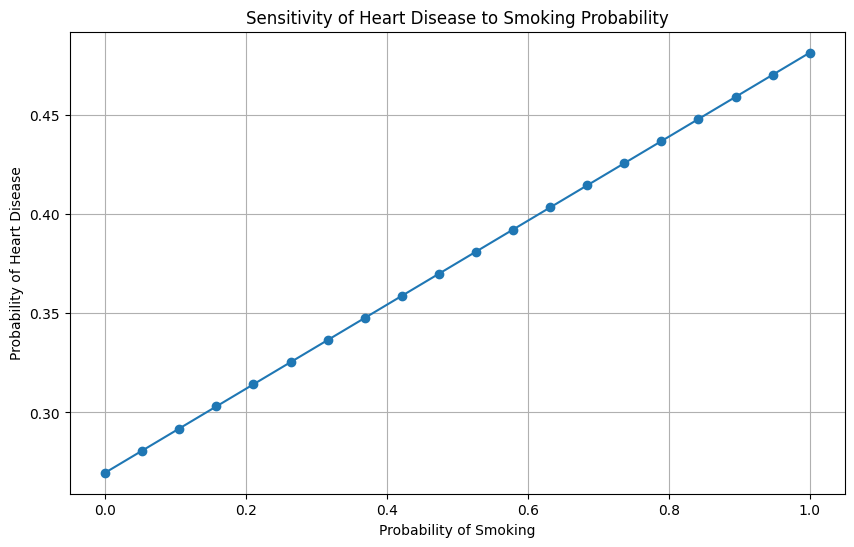

In [25]:
#@title **Exercise 6: Network Visualization and Analysis**

#@markdown ## 1. Visualize the Network
#@markdown Visualize the Bayesian Network with distinct node colors for table-like variables.

def visualize_bn(model):
    # Create a directed graph
    G = nx.DiGraph()
    G.add_edges_from(model.edges())

    # Set up the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)

    # Separate nodes based on whether they're table-like variables
    table_nodes = [node for node in model.nodes() if hasattr(model.get_cpds(node), 'values')]
    non_table_nodes = [node for node in model.nodes() if node not in table_nodes]

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=table_nodes, node_color='lightgreen', node_size=3000, alpha=0.8, label='Table Nodes')
    nx.draw_networkx_nodes(G, pos, nodelist=non_table_nodes, node_color='lightblue', node_size=3000, alpha=0.8, label='Other Nodes')

    # Add labels and edges
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

    # Add a legend
    plt.legend(scatterpoints=1, loc='upper left', fontsize=10)

    # Add title and format
    plt.title("Bayesian Network for Heart Disease Diagnosis", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the Bayesian Network
# Assuming `model` is already defined
# visualize_bn(model)

#@markdown ## 2. Sensitivity Analysis
#@markdown Perform sensitivity analysis to explore the relationship between Smoking and Heart Disease.

def sensitivity_analysis(model, variable, evidence, target):
    inference = VariableElimination(model)
    probabilities = []
    values = np.linspace(0, 1, 20)  # Define 20 values from 0 to 1 for the probability of Smoking

    for value in values:
        # Update the CPD for the variable
        cpd = model.get_cpds(variable)
        new_values = np.array([[1 - value], [value]])
        new_cpd = TabularCPD(variable=variable, variable_card=2,
                             values=new_values,
                             state_names=cpd.state_names)
        model.remove_cpds(cpd)  # Remove the old CPD
        model.add_cpds(new_cpd)  # Add the updated CPD

        # Perform inference
        result = inference.query(variables=[target], evidence=evidence)
        probabilities.append(result.values[1])  # Probability of target being True

    return values, probabilities

# Perform sensitivity analysis
smoking_pr, heart_disease_pr = sensitivity_analysis(model, 'Smoking', {}, 'Heart Disease')

# Assuming `model` is already defined
# smoking_pr, heart_disease_pr = sensitivity_analysis(model, 'Smoking', {}, 'Heart Disease')

#@markdown ## 3. Sensitivity Analysis Results
#@markdown Plot the results of the sensitivity analysis.

plt.figure(figsize=(10, 6))
plt.plot(smoking_pr, heart_disease_pr, marker='o')
plt.title('Sensitivity of Heart Disease to Smoking Probability')
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease')
plt.grid(True)
plt.show()

#@markdown ### Explanation:
#@markdown 1. **Network Visualization**: Differentiates table-like nodes with green color for clarity.
#@markdown 2. **Sensitivity Analysis**: Illustrates the relationship between Smoking and Heart Disease probabilities using a line plot.